# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

656

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Extract data from website using API code 
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# City data list 
city_data = []

# Print Data 
print("Data Extraction")
print ("-" * 15)

# Create counters
record_count = 1
set_count = 1
# Loop through all the cities
for index, city in enumerate(cities):
    # Group cities in sets of 50
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Record URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run request for each city 
    try:
        
        # Extract data using Json
        city_weather = requests.get(city_url).json()
        
        
        # Extract required data 
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append data to respective city 
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not located. Skip next ...")
        pass
    # Confirm data set has been completed
        print("-----------------------")
        print("Data Extraction Complete")
        print("-----------------------")
        
        

Data Extraction
---------------
Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | gigmoto
Processing Record 3 of Set 1 | neka
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | mao
Processing Record 6 of Set 1 | tuatapere
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | frontera
Processing Record 10 of Set 1 | puga
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | tobermory
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | nanortalik
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | brae
Processing Record 21 of Set 1 | teeli
Processing Record 22 of Set 1 | bali
Processing Record 23 of Set 1 | tongliao
Processing Record 24 of Set 1 | puerto ayora
Processing

Processing Record 48 of Set 3 | ribeira grande
Processing Record 49 of Set 3 | tsihombe
City not located. Skip next ...
-----------------------
Data Extraction Complete
-----------------------
Processing Record 0 of Set 4 | atuona
Processing Record 1 of Set 4 | malia
Processing Record 2 of Set 4 | victoria
Processing Record 3 of Set 4 | niquero
Processing Record 4 of Set 4 | doha
Processing Record 5 of Set 4 | loa janan
Processing Record 6 of Set 4 | acajutla
Processing Record 7 of Set 4 | teahupoo
Processing Record 8 of Set 4 | pitimbu
Processing Record 9 of Set 4 | zuenoula
Processing Record 10 of Set 4 | thompson
Processing Record 11 of Set 4 | superior
Processing Record 12 of Set 4 | prusanky
Processing Record 13 of Set 4 | tlaltenango
Processing Record 14 of Set 4 | escanaba
Processing Record 15 of Set 4 | saskylakh
Processing Record 16 of Set 4 | barbar
City not located. Skip next ...
-----------------------
Data Extraction Complete
-----------------------
Processing Record 17 of

Processing Record 19 of Set 7 | batemans bay
Processing Record 20 of Set 7 | kavieng
Processing Record 21 of Set 7 | lodja
Processing Record 22 of Set 7 | muros
Processing Record 23 of Set 7 | saldanha
Processing Record 24 of Set 7 | namanyere
Processing Record 25 of Set 7 | hangal
Processing Record 26 of Set 7 | qui nhon
Processing Record 27 of Set 7 | asau
Processing Record 28 of Set 7 | maragogi
Processing Record 29 of Set 7 | rovaniemi
Processing Record 30 of Set 7 | camacha
Processing Record 31 of Set 7 | tailai
Processing Record 32 of Set 7 | sentyabrskiy
City not located. Skip next ...
-----------------------
Data Extraction Complete
-----------------------
Processing Record 33 of Set 7 | tondi
Processing Record 34 of Set 7 | linjiang
Processing Record 35 of Set 7 | ridgecrest
Processing Record 36 of Set 7 | port elizabeth
Processing Record 37 of Set 7 | nyurba
Processing Record 38 of Set 7 | kruisfontein
Processing Record 39 of Set 7 | koumac
Processing Record 40 of Set 7 | shi

Processing Record 40 of Set 10 | sosva
Processing Record 41 of Set 10 | carpinis
Processing Record 42 of Set 10 | sladkovo
Processing Record 43 of Set 10 | puerto madero
Processing Record 44 of Set 10 | ewo
Processing Record 45 of Set 10 | pontes e lacerda
Processing Record 46 of Set 10 | alofi
Processing Record 47 of Set 10 | hami
Processing Record 48 of Set 10 | kumta
Processing Record 49 of Set 10 | henties bay
Processing Record 0 of Set 11 | uige
Processing Record 1 of Set 11 | chapleau
Processing Record 2 of Set 11 | santa isabel
Processing Record 3 of Set 11 | manokwari
Processing Record 4 of Set 11 | norfolk
Processing Record 5 of Set 11 | daru
Processing Record 6 of Set 11 | noumea
Processing Record 7 of Set 11 | urdzhar
City not located. Skip next ...
-----------------------
Data Extraction Complete
-----------------------
Processing Record 8 of Set 11 | okhotsk
Processing Record 9 of Set 11 | port hardy
Processing Record 10 of Set 11 | erenhot
Processing Record 11 of Set 11 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Transfer to data set to Pandas 
city_data_df = pd.DataFrame(city_data)


# Extract required data information for data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]

# Record Result
city_data_df.to_csv("City_ID.csv",encoding="utf-8",index=False)

# Display Result
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Windspeed     603
Country       603
Date          603
dtype: int64

In [5]:
# Display Result 
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,luderitz,-26.6481,15.1594,70.27,29,1,5.84,NA,1663116882
1,gigmoto,13.7796,124.3900,85.37,74,100,9.22,PH,1663116882
2,neka,36.6508,53.2990,73.06,46,0,6.38,IR,1663116883
3,bengkulu,-3.8004,102.2655,75.90,85,100,2.39,ID,1663116884
4,mao,39.8885,4.2658,81.16,89,20,12.66,ES,1663116885


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
test_stats = city_data_df["Humidity"].describe(include = "all")

print("There are no values over 100% in our data!")

# Display Result
test_stats

There are no values over 100% in our data!


count    603.000000
mean      73.912106
std       18.915108
min        8.000000
25%       65.000000
50%       78.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Record Result
city_data_df.to_csv("Extracted_City_Weather_Data.csv")

# Display Result
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,luderitz,-26.6481,15.1594,70.27,29,1,5.84,NA,1663116882
1,gigmoto,13.7796,124.3900,85.37,74,100,9.22,PH,1663116882
2,neka,36.6508,53.2990,73.06,46,0,6.38,IR,1663116883
3,bengkulu,-3.8004,102.2655,75.90,85,100,2.39,ID,1663116884
4,mao,39.8885,4.2658,81.16,89,20,12.66,ES,1663116885
...,...,...,...,...,...,...,...,...,...
598,maria aurora,15.7967,121.4737,86.94,58,16,7.29,PH,1663117472
599,sawakin,19.1059,37.3321,89.94,46,66,2.26,SD,1663117472
600,ngunguru,-35.6167,174.5000,57.11,67,100,5.55,NZ,1663117473
601,dingle,10.9995,122.6711,85.32,74,10,10.16,PH,1663117474


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

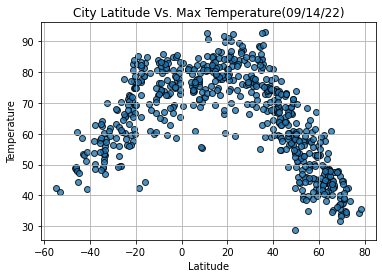

In [8]:
# Scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Setting up graph parameters
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Record Result 
plt.savefig("Fig1.png")

# Display Result
plt.show()

# The graph shows a higher temperature along the equator and reduces in temperature as it moves to the southern and north hemisphere proportionately 

## Latitude vs. Humidity Plot

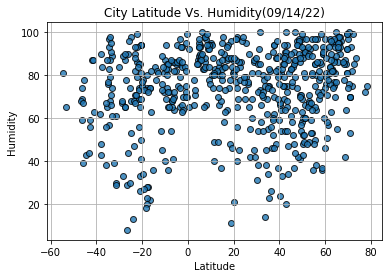

In [9]:
# Scatter plot for latitude vs. Humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Setting up graph parameters
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime ("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("Fig2.png")

# Display plot
plt.show()

# Humidity appears to be higher and more denser in the northern hememisphere due to the wamer season as expected 

## Latitude vs. Cloudiness Plot

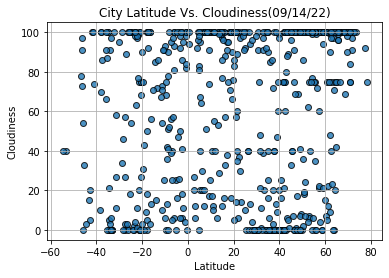

In [10]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Setting up graph parameters
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("Fig3.png")

# Display plot
plt.show()

# Thicker bands of cloud in the northern hemisphere is corellating to the higher humidity shown in previous graph

## Latitude vs. Wind Speed Plot

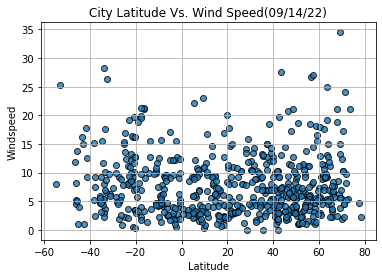

In [11]:
# Build scatter plot for latitude vs. Windspeed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Setting up graph parameters
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

# Wind speed appears to be consisten between 0 to 15 range slightly more concetrated around lattitude 40 to 60 range

## Linear Regression

In [12]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on scatter plot
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Setting up graph parameters
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Variable compared against Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8217890852002574


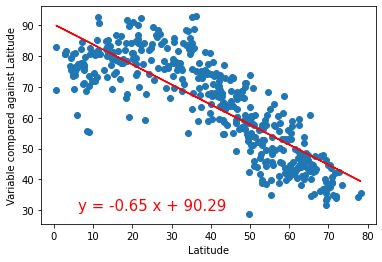

<Figure size 432x288 with 0 Axes>

In [14]:
# Setting up graph parameters
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

# Save figure
plt.savefig("Fig5.png")

# Linear regression showing a negative slope as it moves from equator to northern hemisphere highlighting the tempature drop

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7414804712279298


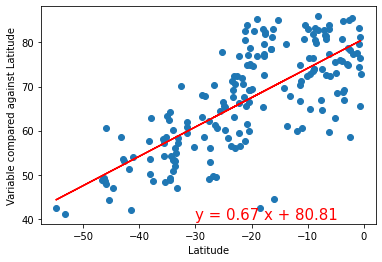

<Figure size 432x288 with 0 Axes>

In [15]:
# Setting up graph parameters
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

# Save figure
plt.savefig("Fig6.png")

# Linear regression showing a postive slope as it moves from southern hemisphere to equator highlighting the tempature increase

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0011340143577841869


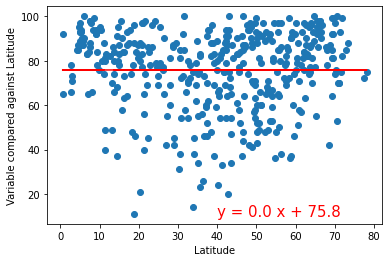

<Figure size 432x288 with 0 Axes>

In [16]:
# Setting up graph parameters
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

# Save figure
plt.savefig("Fig7.png")

# The returned r value is low with no conclusive result to data, humidity can be varied by the timezone across the latitude which might make it more humid at night and lesser during the day. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1516479612418366


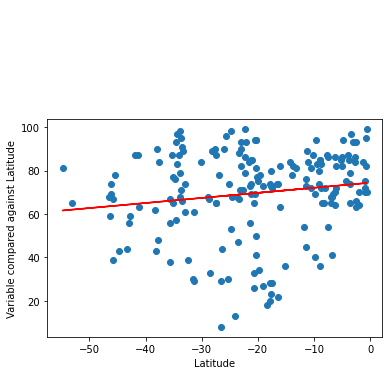

<Figure size 432x288 with 0 Axes>

In [17]:
# Setting up graph parameters
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

# Save figure
plt.savefig("Fig8.png")

# The returned r value is low with no conclusive result to data, humidity can be varied by the timezone across the latitude which might make it more humid at night and lesser during the day. 

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1204913766984775


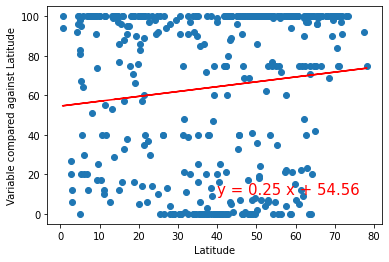

<Figure size 432x288 with 0 Axes>

In [18]:
# Setting up graph parameters
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

# Save figure
plt.savefig("Fig9.png")

# r result show low value indicating there is no corelation between cloudiness and latitude. Its difficult to draw a conclusive finding from the graph

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10193040520036534


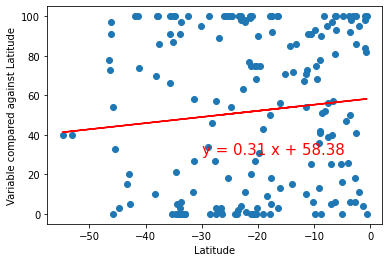

<Figure size 432x288 with 0 Axes>

In [19]:
# Setting up graph parameters
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

# Save figure
plt.savefig("Fig10.png")

# r result show low value indicating there is no corelation between cloudiness and latitude. Its difficult to draw a conclusive finding from the graph# 

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1398716088464466


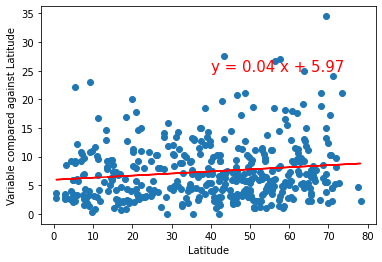

<Figure size 432x288 with 0 Axes>

In [20]:
# Setting up graph parameters
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

# Save figure
plt.savefig("Fig11.png")

# Midsphere windspeed appears more concetrated by no conclusive data can be draw from the graph beside windspeed 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1560624187985956


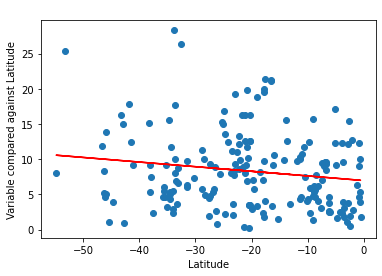

<Figure size 432x288 with 0 Axes>

In [21]:
# Setting up graph parameters
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))

# Save figure
plt.savefig("Fig12.png")

# Midsphere windspeed appears more concetrated by no conclusive data can be draw from the graph beside windspeed